In [2]:
!pip install pandas matplotlib

  Using cached pandas-2.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (107 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cache

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
results_path = "results/metrics.csv"
results_df = pd.read_csv(results_path)

In [5]:
results_df

,tool,exp_no,t_import_concat_s,t_transform_s,t_save_s,mem_avg_mb,mem_peak_mb,output_size_mb,created_at
0,pandas,1,13.210485,0.770948,0.055027,335.821631,470.386719,0.001984,2025-08-12 22:54:17
1,pyspark,1,28.819171,5.169471,1.182283,1950.326144,2969.957031,0.018061,2025-08-12 22:55:38
2,duckdb,1,9.810310,1.334380,0.005091,1953.474712,3395.781250,0.000781,2025-08-12 23:05:14
3,polars,1,0.498599,7.185783,0.007564,1170.425375,1425.996094,0.000982,2025-08-12 23:07:49
4,pandas,2,13.240796,0.754226,0.047085,338.132315,470.925781,0.001984,2025-08-12 23:10:05
5,polars,2,0.623521,7.260361,0.001334,1165.459899,1427.613281,0.000982,2025-08-12 23:10:14
6,pyspark,2,35.388299,4.695274,1.146889,1915.698684,3409.277344,0.018061,2025-08-12 23:11:02
7,duckdb,2,10.050803,1.319891,0.001761,1988.507543,3425.660156,0.000781,2025-08-12 23:11:15
8,pandas,3,13.195860,0.745656,0.032617,337.178300,470.355469,0.001984,2025-08-13 00:07:13
9,polars,3,0.531354,7.268912,0.001397,1169.594902,1427.617188,0.000982,2025-08-13 00:07:22


In [21]:
# Drop unwanted columns
results_df = results_df.drop(columns=["created_at", "exp_no"], errors="ignore")

# Group by 'tool' and average numeric columns
grouped_df = results_df.groupby("tool", as_index=False).mean()

grouped_df["output_size_kb"] = grouped_df["output_size_mb"] * 1024
grouped_df = grouped_df.drop(columns=["output_size_mb"], errors="ignore")

grouped_df["t_concat_transform_s"] = grouped_df[["t_import_concat_s", "t_transform_s"]].sum(axis=1)
grouped_df = grouped_df.drop(columns=["t_import_concat_s", "t_transform_s"], errors="ignore")

In [22]:
grouped_df

,tool,t_save_s,mem_avg_mb,mem_peak_mb,output_size_kb,t_concat_transform_s
0,duckdb,0.003857,1973.058527,3363.432292,0.799805,11.212325
1,pandas,0.044910,337.044082,470.555990,2.031250,13.972657
2,polars,0.003432,1168.493392,1427.075521,1.005859,7.789510
3,pyspark,1.142629,1914.989916,4268.486979,18.494141,38.343293


In [23]:
pretty_names = {
    "t_concat_transform_s": "Concat & Transform Time",
    "t_save_s": "Save Time",
    "mem_avg_mb": "Memory Usage (MB)",
    "mem_peak_mb": "Memory Peak Usage (MB)",
    "output_size_kb": "Output Size (KB)"
}

tool_order = sorted(grouped_df["tool"].unique())
grouped_df["tool"] = pd.Categorical(grouped_df["tool"], categories=tool_order, ordered=True)
grouped_df = grouped_df.sort_values("tool")

palette = plt.cm.viridis
color_map = {tool: palette(i / (len(tool_order)-1)) for i, tool in enumerate(tool_order)}

plt.style.use("ggplot")

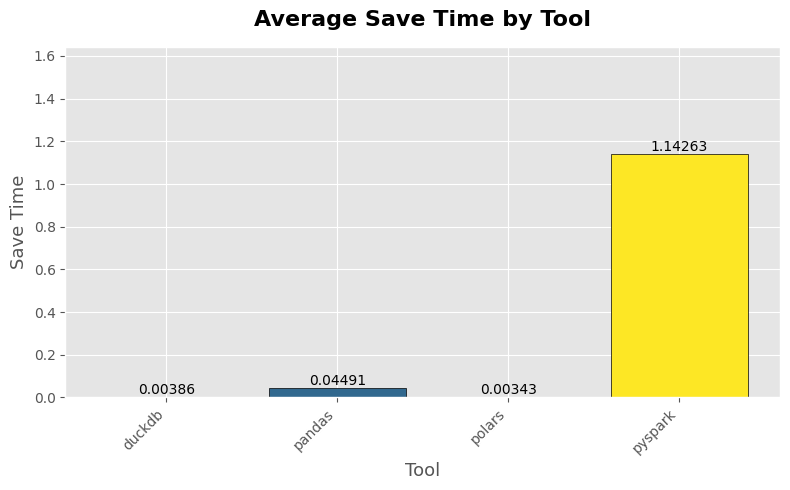

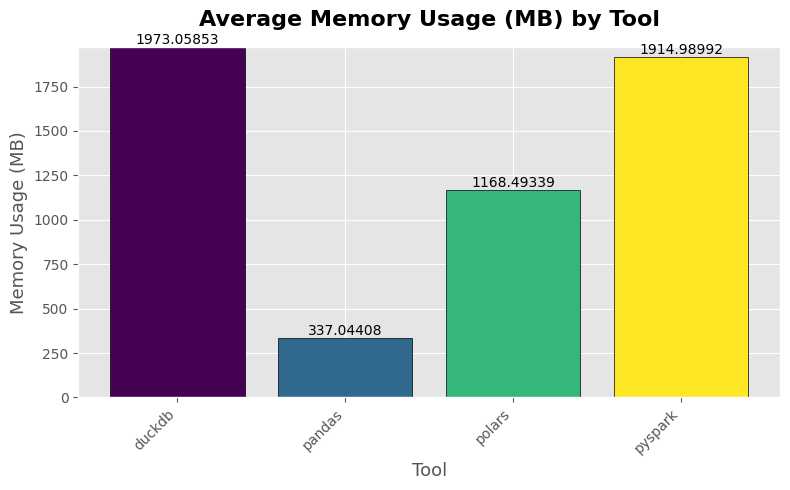

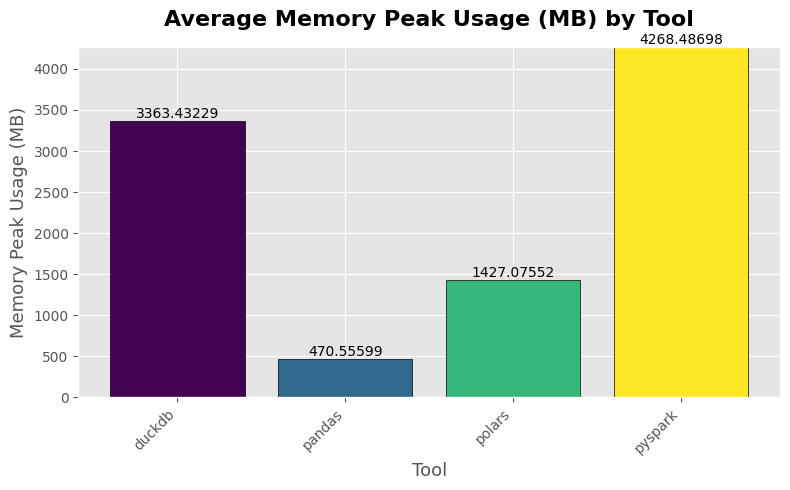

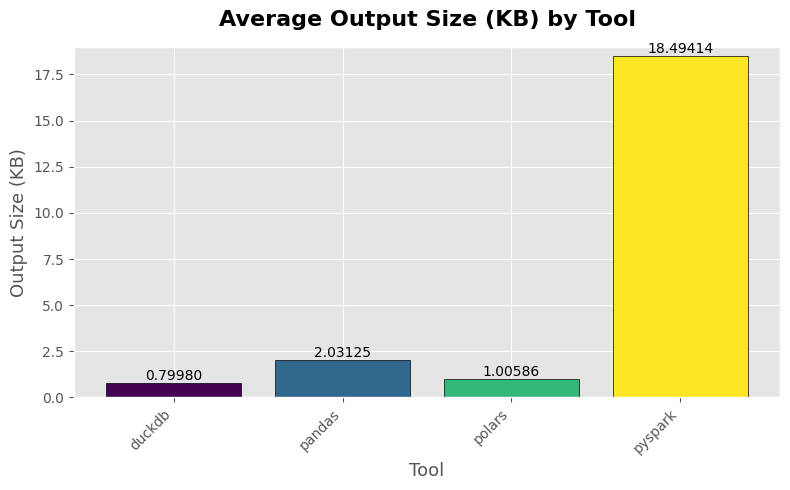

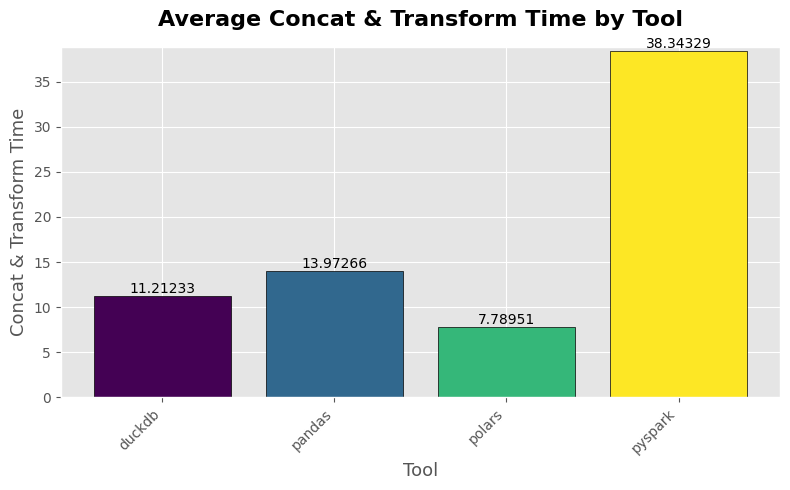

In [25]:
import os

# Create the assets folder if it doesn't exist
os.makedirs("assets", exist_ok=True)

for col in grouped_df.columns:
    if col != "tool":
        fig, ax = plt.subplots(figsize=(8, 5))

        bars = ax.bar(
            grouped_df["tool"],
            grouped_df[col],
            color=[color_map[t] for t in grouped_df["tool"]],
            edgecolor="black"
        )

        col_label = pretty_names.get(col, col.replace("_", " ").title())
        ax.set_title(f"Average {col_label} by Tool", fontsize=16, fontweight="bold", pad=15)
        ax.set_xlabel("Tool", fontsize=13)
        ax.set_ylabel(col_label, fontsize=13)

        ymin = 0
        ymax = grouped_df[col].max() + 0.5
        ax.set_ylim(ymin, ymax)

        plt.xticks(rotation=45, ha="right")

        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height,
                f"{height:.5f}",
                ha="center",
                va="bottom",
                fontsize=10
            )

        plt.tight_layout()

        # Save figure as PNG with the column name as file name
        filename = f"assets/{col}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")

        plt.show()
